In [1]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.GTS_Learner import *
from Advertising.learners.GTS_Learner_qualities import *
from experiment_utilities import *

seed = 6789 
arms = arms_creation(seed = 30291, number_of_arms= 20)
random.seed(seed)

exploration=4.2

deltas=[0.5,0.42,0.38,0.30,0.2,0.05]

social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')

with open('Config/estimated_influence.json', 'r') as file:
    data = json.load(file)
    nodes_estimation = data.get('estimated_influence')

with open('Config/clairvoyants.json', 'r') as file:
    clairvoyants = json.load(file)

n_rounds=6000
print(clairvoyants)

all_bids = create_adv_bids()

{'clairvoyant_q_f': 0.24936147844443757, 'clairvoyant_q_a': 0.48842019490079885, 'clairvoyant_nq_f': 1.7742390000000792, 'clairvoyant_nq_a': 2.1363950000000385}


In [ ]:
from Advertising.learners.UCB_Learner_qualities import *

# Running UCB, missing qualities, samples in only first position

learner_TS = GTS_Learner_qualities( arms = arms, variance=20, ad_id = 1, nodes_estimation = nodes_estimation)
learner_UCB = UCB_Learner_qualities( arms = arms, hyperpar=exploration, nodes_estimation = nodes_estimation)

moving_average_TS = experiment(rounds = n_rounds, learner = learner_TS, all_bids = all_bids, arms = arms,
                            social_network= social_network, first = True, qualities = True)
moving_average_UCB = experiment(rounds = n_rounds, learner = learner_UCB, all_bids = all_bids, arms = arms,
                            social_network= social_network, first = True, qualities = True)

clairvoyant = clairvoyants.get('clairvoyant_q_f')
# Plotting

plt.figure()
plt.axhline(y = clairvoyant, color = 'r', linestyle = '-')
plt.plot(moving_average_TS, color = 'b')
plt.plot(moving_average_UCB, color = 'g')
plt.legend(["clairvoyant", "MA-TS", "MA-UCB"])
plt.ylabel("Rolling Mean Reward")
plt.xlabel("Rounds")
plt.show()


In [2]:
from Advertising.learners.UCB_Learner_qualities import *

experiments = 50
clairvoyant = clairvoyants.get('clairvoyant_q_f')

ts_rewards_exp = []
ucb_rewards_exp = []

for exp in trange(experiments):
    learner_TS = GTS_Learner_qualities( arms = arms, variance=20, ad_id = 1, nodes_estimation = nodes_estimation)
    learner_UCB = UCB_Learner_qualities( arms = arms, hyperpar=exploration, nodes_estimation = nodes_estimation)

    experiment(rounds = n_rounds, learner = learner_TS, all_bids = all_bids, arms = arms,
                            social_network= social_network, first = True, qualities = True)
    experiment(rounds = n_rounds, learner = learner_UCB, all_bids = all_bids, arms = arms,
                            social_network= social_network, first = True, qualities = True)
                            
    ts_rewards_exp.append(learner_TS.collected_rewards)
    ucb_rewards_exp.append(learner_UCB.collected_rewards)




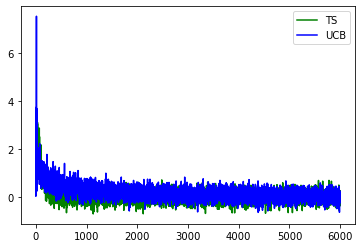

In [32]:
clair = np.ones((50,6000))
clair = clair * clairvoyant

regrets_ts = np.matrix(ts_rewards_exp)
regrets_ucb = np.matrix(ucb_rewards_exp)

regrets_ts = np.subtract(clair, regrets_ts)
regrets_ucb = np.subtract(clair, regrets_ucb)


# Calculate the average regret for each iteration t
# Note that we are conducting n_experiments so we need the average over all the experiments for each iteration t
# Note that axis=0 means that you are averaging over each iteration t (over the column)
avg_regrets_ts = np.mean(regrets_ts, axis=0)
avg_regrets_ucb = np.mean(regrets_ucb, axis=0)

plt.figure()
# Plot
plt.plot(avg_regrets_ts.tolist()[0], 'g')
plt.plot(avg_regrets_ucb.tolist()[0], 'b')

# The same is done for Greedy_Learner

plt.legend(["TS", "UCB"])
plt.show()